# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings 
warnings.filterwarnings('ignore')

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [3]:
df = pd.read_csv('data/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *ENTER YOUR CHOICE HERE*

The focus of this EDA will be on <b>Grade 4 Math<b>

How many years of data are logged in our dataset? 

In [4]:
yrs_logged = df.YEAR.unique().tolist()
len(yrs_logged)

33

Additional notes

In [5]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [6]:
columns_keep = ['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'AVG_MATH_4_SCORE']

In [7]:
df_filter = df[columns_keep]
df_filter.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,AVG_MATH_4_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,208.0
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,215.0
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,210.0
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,208.0


In [8]:
df_filter[df_filter['ENROLL'].notna()]

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,AVG_MATH_4_SCORE
51,1993_ALABAMA,ALABAMA,1993,727716.0,2827391.0,331409.0,1729295.0,766687.0,2833433.0,1564558.0,794146.0,237222.0,204207.0,NaN
52,1993_ALASKA,ALASKA,1993,121156.0,1191398.0,176150.0,775829.0,239419.0,1126398.0,494917.0,433788.0,36291.0,135791.0,NaN
53,1993_ARIZONA,ARIZONA,1993,676297.0,3427976.0,318465.0,1415407.0,1694104.0,3623946.0,1578889.0,1000914.0,164083.0,680139.0,NaN
54,1993_ARKANSAS,ARKANSAS,1993,311432.0,1346909.0,128196.0,771079.0,447634.0,1376067.0,782791.0,386526.0,68617.0,97824.0,NaN
55,1993_CALIFORNIA,CALIFORNIA,1993,5129788.0,28043338.0,2151157.0,17064146.0,8828035.0,28110986.0,15281147.0,8914559.0,1608514.0,1944760.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,2016_VIRGINIA,VIRGINIA,2016,1283493.0,16259274.0,1058146.0,6297587.0,8903541.0,16497520.0,8944614.0,5164699.0,643506.0,1161323.0,NaN
1271,2016_WASHINGTON,WASHINGTON,2016,1083973.0,14964364.0,1097684.0,9211201.0,4655479.0,15253296.0,7087365.0,4904575.0,577606.0,2204059.0,NaN
1272,2016_WEST_VIRGINIA,WEST_VIRGINIA,2016,276764.0,3391579.0,358068.0,1863062.0,1170449.0,3366566.0,1804235.0,1127255.0,236487.0,181392.0,NaN
1273,2016_WISCONSIN,WISCONSIN,2016,857736.0,11697466.0,782610.0,5986763.0,4928093.0,11787535.0,5760418.0,3691439.0,508013.0,1082849.0,NaN


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [9]:
state_mean = df.groupby('STATE')['AVG_MATH_4_SCORE'].mean()
two_states = state_mean[['OHIO','MICHIGAN']]
two_states

STATE
OHIO        239.454545
MICHIGAN    234.363636
Name: AVG_MATH_4_SCORE, dtype: float64

Find the average for your chosen test across all states in 2019

In [10]:
yr_2019 = df_filter[df_filter['YEAR'] == 2019]
yr_2019['AVG_MATH_4_SCORE'].sum() / yr_2019.shape[0]


239.9433962264151

For each state, find a maximum value for your chosen test score

In [11]:
max_val = df.groupby('STATE')['AVG_MATH_4_SCORE'].max()
max_val


STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [12]:
df_filter.dropna(subset=['ENROLL','AVG_MATH_4_SCORE'], inplace=True)

In [13]:
df_filter.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,AVG_MATH_4_SCORE
408,2000_ALABAMA,ALABAMA,2000,730184.0,4885917.0,425978.0,3003814.0,1456125.0,5003267.0,2551713.0,1319053.0,395909.0,663903.0,217.0
410,2000_ARIZONA,ARIZONA,2000,814807.0,5479168.0,534619.0,2481089.0,2463460.0,5397194.0,2488932.0,1573568.0,270671.0,768425.0,219.0
411,2000_ARKANSAS,ARKANSAS,2000,450751.0,2844855.0,254735.0,2126099.0,464021.0,2683400.0,1531232.0,804253.0,138220.0,146666.0,216.0
412,2000_CALIFORNIA,CALIFORNIA,2000,5941946.0,46628207.0,4024940.0,26877920.0,15725347.0,45829753.0,23514388.0,12429070.0,2269603.0,5849441.0,213.0
414,2000_CONNECTICUT,CONNECTICUT,2000,530363.0,5884078.0,234321.0,2298931.0,3350826.0,5605280.0,3189123.0,1634888.0,180639.0,369278.0,234.0


In [14]:
#support per student
df_filter.loc[:,'support_per_student'] = df_filter['SUPPORT_SERVICES_EXPENDITURE'] / df_filter['ENROLL']


In [15]:
df_filter.loc[:,'instruction_per_student'] = df_filter['INSTRUCTION_EXPENDITURE'] / df_filter['ENROLL']

In [16]:
df_features = df_filter.loc[:,['AVG_MATH_4_SCORE','support_per_student','instruction_per_student', 'STATE','YEAR']]
df_features.head()


,AVG_MATH_4_SCORE,support_per_student,instruction_per_student,STATE,YEAR
408,217.0,1.806467,3.494616,ALABAMA,2000
410,219.0,1.931216,3.054628,ARIZONA,2000
411,216.0,1.784251,3.397068,ARKANSAS,2000
412,213.0,2.091751,3.957355,CALIFORNIA,2000
414,234.0,3.082583,6.013095,CONNECTICUT,2000


In [17]:
mich = df_features[df_features['STATE']=='MICHIGAN']
ohio = df_features[df_features['STATE']=='OHIO']
mich.drop(columns=['STATE'], inplace=True)
ohio.drop(columns=['STATE'], inplace=True)
print(mich.shape, ohio.shape)

(8, 4) (8, 4)


Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

Support resources available and instructor spend per student are likely a better indicators than total expenditure. This is because total expenditure can include many other things like janitorial supplies etc. 

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

In [27]:
#normalize the data
scaler = StandardScaler()
mich_scaled = scaler.fit_transform(mich)
mich_scaled = pd.DataFrame(mich_scaled, columns=mich.columns)
mich_corr = mich_scaled.corr()

In [28]:
ohio_scaled = scaler.fit_transform(ohio)
ohio_scaled = pd.DataFrame(ohio_scaled, columns=ohio.columns)
ohio_corr = ohio_scaled.corr()

<Axes: >

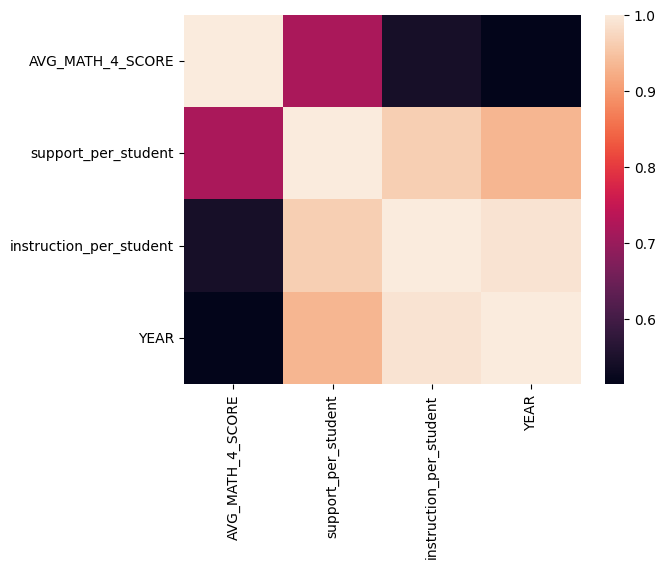

In [29]:
sns.heatmap(mich_corr)
  


<Axes: >

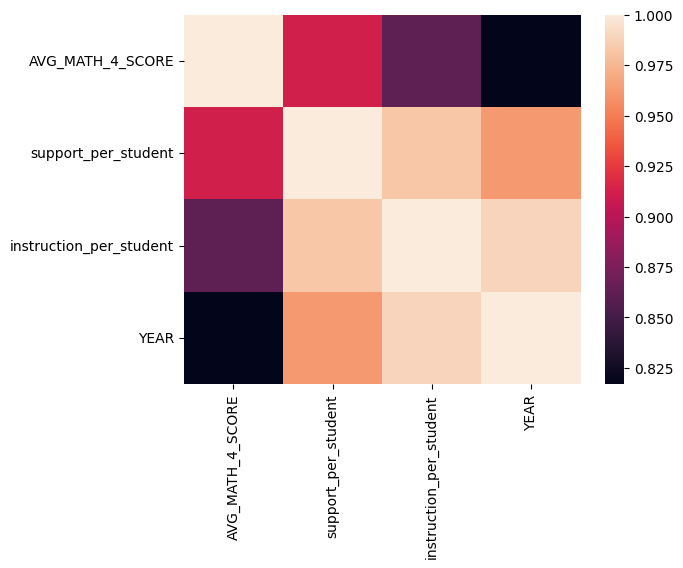

In [30]:
sns.heatmap(ohio_corr)

The patterns among states varies with Ohio showing a stronger correlation between support per student and instruction per student and test scores than Michigan. This suggests further analysis is warranted and a review of additional features. The correlation overall for Michigan is very low showing these are not good predictor variables for the state.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [22]:
# from sklearn.model_selection import train_test_split

In [31]:
model_df = df_features.drop(columns=['STATE','YEAR'])

In [32]:
model_df

,AVG_MATH_4_SCORE,support_per_student,instruction_per_student
408,217.0,1.806467,3.494616
410,219.0,1.931216,3.054628
411,216.0,1.784251,3.397068
412,213.0,2.091751,3.957355
414,234.0,3.082583,6.013095
...,...,...,...
1219,247.0,3.965653,6.841255
1220,245.0,4.206308,6.069762
1221,235.0,4.156257,6.509767
1222,243.0,4.283770,6.641202


In [33]:
X = model_df.drop(columns=['AVG_MATH_4_SCORE'])
y = model_df['AVG_MATH_4_SCORE']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [35]:
# create your model here
model = LinearRegression()

In [36]:
model.fit(X_train, y_train)

LinearRegression()

In [37]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [38]:
#evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mse

59.205090255573715

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

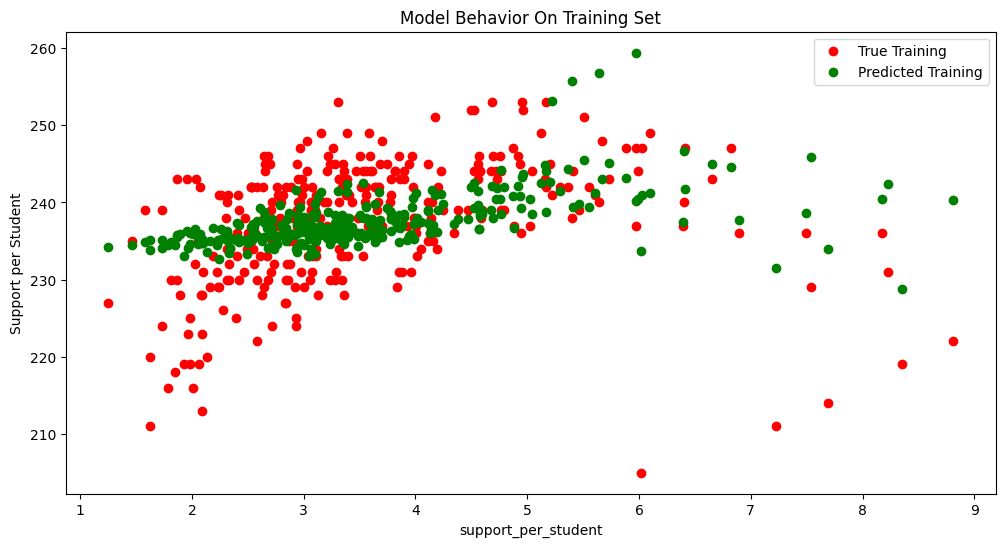

In [39]:
col_name = 'support_per_student'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Support per Student')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

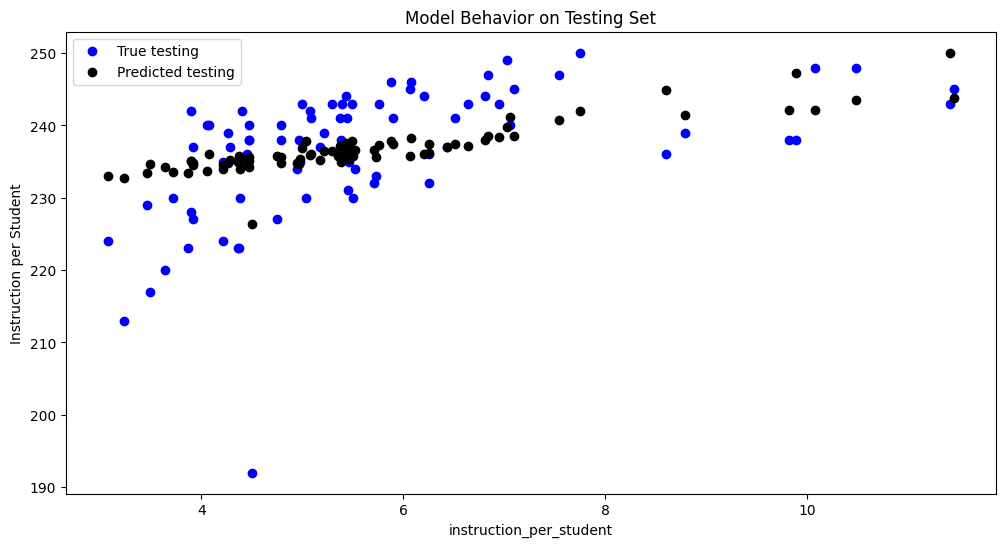

In [41]:
col_name = 'instruction_per_student'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Instruction per Student')
plt.title("Model Behavior on Testing Set")